In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
test_all_real = pd.read_pickle('./data/test_all.pkl')

In [4]:
test_all_real['x'].shape

(5795, 1, 6392, 1)

In [10]:
test_all_real['x'][:,0,0].shape

(5795, 1)

In [3]:
test_all_real_one = test_all_real['x'][:,0,0][:,0][:96]
test_all_real_one.shape

(96,)

In [4]:
import torch
test_all_predict = torch.load('./exps/Qtraffic/MGT/E03/output_all.pth')
print(test_all_predict.shape)

torch.Size([5795, 1, 6392, 1])


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
test_all_predict[:,0,0].shape

torch.Size([5795, 1])

In [24]:
test_all_predict[:,0,0][:,0]

tensor([38.4396, 45.8928, 45.7911,  ..., 24.3323, 22.1081, 22.8417])

In [5]:
test_all_predict_one = np.array(test_all_predict[:,0,0][:,0][:96])
test_all_predict_one.shape

(96,)

In [6]:
x_time = []
for i in range(24):
    for j in [':00',':15',':30',':45']:
        x_time.append(str(i)+j)
len(x_time)

96

In [34]:
np.array(x_time)

array(['0:00', '0:15', '0:30', '0:45', '1:00', '1:15', '1:30', '1:45',
       '2:00', '2:15', '2:30', '2:45', '3:00', '3:15', '3:30', '3:45',
       '4:00', '4:15', '4:30', '4:45', '5:00', '5:15', '5:30', '5:45',
       '6:00', '6:15', '6:30', '6:45', '7:00', '7:15', '7:30', '7:45',
       '8:00', '8:15', '8:30', '8:45', '9:00', '9:15', '9:30', '9:45',
       '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30',
       '11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15',
       '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00',
       '15:15', '15:30', '15:45', '16:00', '16:15', '16:30', '16:45',
       '17:00', '17:15', '17:30', '17:45', '18:00', '18:15', '18:30',
       '18:45', '19:00', '19:15', '19:30', '19:45', '20:00', '20:15',
       '20:30', '20:45', '21:00', '21:15', '21:30', '21:45', '22:00',
       '22:15', '22:30', '22:45', '23:00', '23:15', '23:30', '23:45'],
      dtype='<U5')

In [ ]:
test_all_real_one

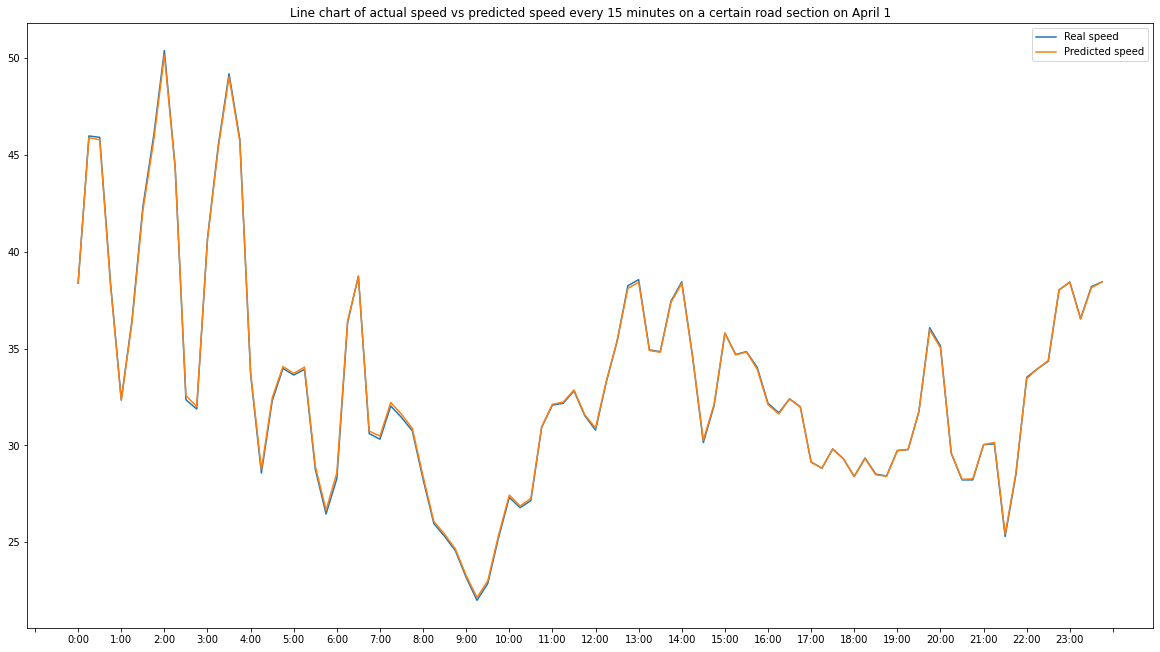

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
x = np.array(x_time)
# initialize plot parameters
plt.title('Line chart of actual speed vs predicted speed every 15 minutes on a certain road section on April 1')
plt.rcParams['figure.figsize'] = (10 * 16 / 9, 10)
plt.subplots_adjust(left=0.06, right=0.94, top=0.92, bottom=0.08)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
# plot curve 1
plt.plot(x, test_all_real_one, label='Real speed')
# plot curve 2
plt.plot(x, test_all_predict_one, label='Predicted speed')

# show the legend
plt.legend()
# show the picture
plt.savefig('./figs/real_vs_predicted_speed.png')
plt.show()